# 📘 **SAIKET SYSTEMS INTERNSHIP - TASK 1✅**
---
# ✅ "PROJECT-CUSTOMER CHURN ANALYSIS AND PREDICTION"
---
**1.DATA CLEANING & PREPROCESSING**
-----

~BY AKASH. V

---
# 🧹 **Task Description:**

# ->Handle missing values in the dataset
# ->Convert categorical variables into numerical representations using techniques like one-hot encoding
---


# 1️⃣ Import Required Libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 2️⃣ Load Dataset

In [ ]:
from google.colab import files
uploaded = files.upload()

df = pd.read_excel("Telco_Customer_Churn_Dataset.xlsx")


Saving Telco_Customer_Churn_Dataset.xlsx to Telco_Customer_Churn_Dataset (1).xlsx


# 3️⃣ Initial Data Overview

In [ ]:
print("\n🔍 Dataset Shape:", df.shape)
df.head()


🔍 Dataset Shape: (7043, 21)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# 4️⃣ Check for Missing Values

In [ ]:
print("\n🧼 Missing Values:")
print(df.isnull().sum())


🧼 Missing Values:
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


# 5️⃣ Visualize Missing Data

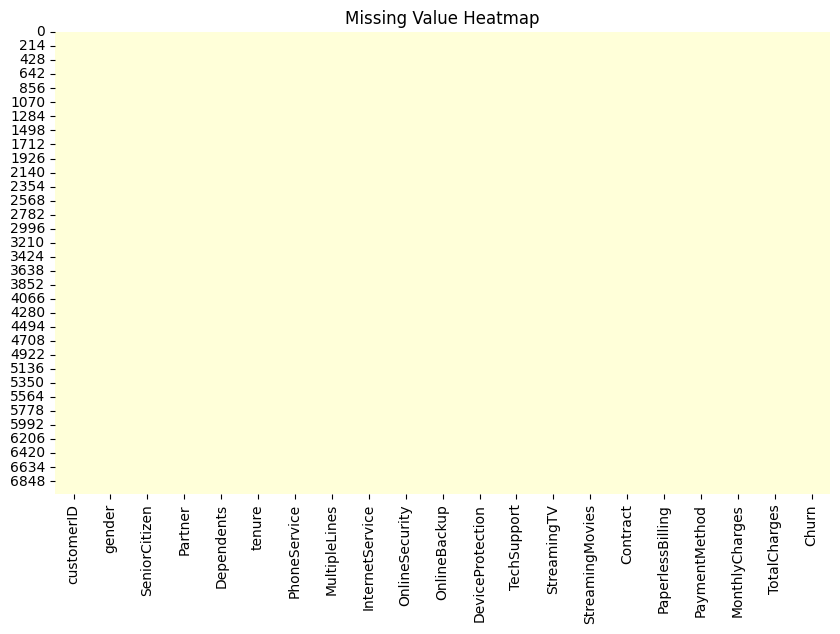

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull(), cbar=False, cmap="YlGnBu")
plt.title("Missing Value Heatmap")
plt.show()

# 6️⃣ Drop Unnecessary Column

In [ ]:
# 'customerID' is irrelevant for prediction
df.drop('customerID', axis=1, inplace=True)


# 7️⃣ Convert 'TotalCharges' to Numeric (fix object dtype)

In [ ]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [ ]:
# Impute missing TotalCharges with median
df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)

/tmp/ipython-input-3570578447.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)


# 8️⃣ Binary Label Encoding (Yes/No → 1/0)

In [ ]:
binary_cols = ['Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']
for col in binary_cols:
    df[col] = df[col].map({'Yes': 1, 'No': 0})

# 9️⃣ One-Hot Encoding for Multi-Class Categorical Columns

In [ ]:
multi_class_cols = ['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
                    'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
                    'Contract', 'PaymentMethod', 'gender']

In [ ]:
# Apply One-Hot Encoding
df = pd.get_dummies(df, columns=multi_class_cols, drop_first=True)

# 🔟 Final Dataset Check

In [ ]:
print("\n✅ Data Types After Encoding:")
print(df.dtypes)
print("\n📌 Cleaned Data Preview:")
df.head()


✅ Data Types After Encoding:
SeniorCitizen                              int64
Partner                                    int64
Dependents                                 int64
tenure                                     int64
PhoneService                               int64
PaperlessBilling                           int64
MonthlyCharges                           float64
TotalCharges                             float64
Churn                                      int64
MultipleLines_No phone service              bool
MultipleLines_Yes                           bool
InternetService_Fiber optic                 bool
InternetService_No                          bool
OnlineSecurity_No internet service          bool
OnlineSecurity_Yes                          bool
OnlineBackup_No internet service            bool
OnlineBackup_Yes                            bool
DeviceProtection_No internet service        bool
DeviceProtection_Yes                        bool
TechSupport_No internet service        

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,MultipleLines_No phone service,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,gender_Male
0,0,1,0,1,0,1,29.85,29.85,0,True,...,False,False,False,False,False,False,False,True,False,False
1,0,0,0,34,1,0,56.95,1889.50,0,False,...,False,False,False,False,True,False,False,False,True,True
2,0,0,0,2,1,1,53.85,108.15,1,False,...,False,False,False,False,False,False,False,False,True,True
3,0,0,0,45,0,0,42.30,1840.75,0,True,...,False,False,False,False,True,False,False,False,False,True
4,0,0,0,2,1,1,70.70,151.65,1,False,...,False,False,False,False,False,False,False,True,False,False


# 🔄 Save Cleaned Dataset

In [ ]:
df.to_csv("cleaned_churn_data.csv", index=False)
print("\n💾 Cleaned data saved as 'cleaned_churn_data.csv'")



💾 Cleaned data saved as 'cleaned_churn_data.csv'


# 🔧 **Skills Gained:**
# -> Data cleaning techniques
# -> Missing data handling
# -> Encoding categorical variables

### ✅ **Conclusion – Task 1: Data Cleaning & Preprocessing**

In this task, we successfully prepared the raw telecom customer dataset for further analysis and modeling. We handled missing values, dropped irrelevant columns like `customerID`, and transformed all categorical variables using label and one-hot encoding techniques. The cleaned dataset is now entirely numerical, consistent, and ready for insights, segmentation, and machine learning applications.

This foundational step ensures accuracy and reliability in the subsequent analysis stages of the project.

**~AKASH. V - DATA ANALYSIS INTERN AT SAIKET SYSTEMS**